In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
from textblob import TextBlob
from sklearn.model_selection import train_test_split

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import plot_importance
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls


In [3]:
df_2017=pd.read_csv('../data/datasets_top50-2017.csv')
df_2018=pd.read_csv('../data/datasets_top50-2018.csv')
df_2019=pd.read_csv('../data/datasets_top50-2019.csv',encoding='latin-1')


In [4]:
def data_properties(year):
    print("properties for year are as follows :\n")
    print("column details:\n")
    print(year.columns)
    print("shape:\n")
    print(year.shape)
    print("info about dataset:\n")
    print(year.info())
    print("\n")


In [5]:
data_properties(df_2017)
#data_properties(df_2018)
data_properties(df_2019)

properties for year are as follows :

column details:

Index(['id', 'name', 'artists', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature'],
      dtype='object')
shape:

(100, 16)
info about dataset:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                100 non-null    object 
 1   name              100 non-null    object 
 2   artists           100 non-null    object 
 3   danceability      100 non-null    float64
 4   energy            100 non-null    float64
 5   key               100 non-null    float64
 6   loudness          100 non-null    float64
 7   mode              100 non-null    float64
 8   speechiness       100 non-null    float64
 9   acousticness      100 non-null    float64


### as we can see2019 data is kind of different so we need to change the columsn name aililar to 2017 and 2018 data .... 
### will do it later

In [6]:
def checkfornull(year):
    print("cheking for null values......")
    print(year.columns[year.isnull().any()])
    output=year.isnull().sum()
    return output 

In [7]:
checkfornull(df_2017)

cheking for null values......
Index([], dtype='object')


id                  0
name                0
artists             0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
time_signature      0
dtype: int64

In [8]:
# in the data we obsrve that all the data is not in float .So , in order to maintain a symetry,we will 
# convert the non float data to float data type

def float_conversion(column,value):
    column= pd.to_numeric(value, downcast="float")
    return column


In [9]:
float_conversion(df_2017.mode,df_2017["mode"])
float_conversion(df_2017.duration_ms,df_2017["duration_ms"])
float_conversion(df_2017.time_signature,df_2017["time_signature"])

df_2017.head()


,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0


In [10]:
#lets analyse  each  columns sequentially for better understanding of the data

In [11]:
def understand_feature(feature):
    return feature.describe()


In [12]:
#The higher the value, the easier it is to dance to this song.
print("overall danceability feature\n")
understand_feature(df_2017["danceability"])


overall danceability feature



count    100.00000
mean       0.69682
std        0.12508
min        0.25800
25%        0.63500
50%        0.71400
75%        0.77025
max        0.92700
Name: danceability, dtype: float64

In [13]:
print("top 10  danceability feature\n")
understand_feature(df_2017["danceability"].head(10))



top 10  danceability feature



count    10.000000
mean      0.726300
std       0.103301
min       0.609000
25%       0.645000
50%       0.710000
75%       0.802500
max       0.904000
Name: danceability, dtype: float64

In [14]:
#sorting out more danceble songs 
df_2017['dancebility_new']=df_2017['danceability']
df_2017.loc[df_2017['danceability']>=0.6000,'dancebility_new']='1'
df_2017.loc[(df_2017['danceability']<0.6000),'dancebility_new']='0'

print(df_2017['dancebility_new'].value_counts())

1    83
0    17
Name: dancebility_new, dtype: int64


In [15]:
print("top 10  energy  feature\n")
understand_feature(df_2017["energy"].head(10))

top 10  energy  feature



count    10.00000
mean      0.64800
std       0.11705
min       0.45100
25%       0.57275
50%       0.64350
75%       0.74375
max       0.81500
Name: energy, dtype: float64

In [16]:
#understanding beats per minute i.e tempo of the song
#here we do classification of the tempo on the bases of beats per min 
#REf:https://www.musical-u.com/learn/rhythm-tips-for-identifying-music-genres-by-ear/
df_2017['tempo_rate']=df_2017['tempo']


In [17]:
df_2017.loc[df_2017['tempo']<65,'tempo_rate']='very slow'
df_2017.loc[(df_2017['tempo']>=66) & (df_2017['tempo']<=76),'tempo_rate']='slow'
df_2017.loc[(df_2017['tempo']>=77) & (df_2017['tempo']<=108),'tempo_rate']='moderate'
df_2017.loc[(df_2017['tempo']>=109) & (df_2017['tempo']<=168),'tempo_rate']='fast'
df_2017.loc[df_2017['tempo']>168,'tempo_rate']='very fast'


In [18]:
print("Tempo Rate\tCount\n")
print(df_2017['tempo_rate'].value_counts())
print("\n")
df_2017.head()

Tempo Rate	Count

moderate     46
fast         45
very fast     7
slow          2
Name: tempo_rate, dtype: int64




,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,1,moderate
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,1,moderate
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,1,very fast
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,1,moderate
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,1,moderate


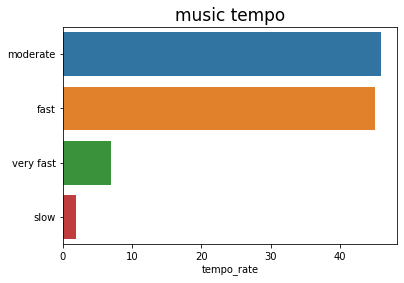

In [20]:
sns.barplot(x=pd.DataFrame(df_2017['tempo_rate'].value_counts()).tempo_rate, 
            y=pd.DataFrame(df_2017['tempo_rate'].value_counts()).index
           )
plt.title('music tempo', fontsize=17);

sort the songs on the bases of important parametes like :

In [21]:
df_2017[['name','artists','danceability','valence','tempo','tempo_rate','energy']].sort_values(by=["danceability","energy","valence"],ascending=False).head(10)

,name,artists,danceability,valence,tempo,tempo_rate,energy
48,Bad and Boujee (feat. Lil Uzi Vert),Migos,0.927,0.175,127.076,fast,0.665
51,Fake Love,Drake,0.927,0.605,133.987,fast,0.488
5,HUMBLE.,Kendrick Lamar,0.904,0.400,150.020,fast,0.611
42,Feels,Calvin Harris,0.893,0.872,101.018,moderate,0.745
94,Bank Account,21 Savage,0.884,0.376,75.016,slow,0.346
62,You Don't Know Me - Radio Edit,Jax Jones,0.876,0.682,124.007,fast,0.669
38,Strip That Down,Liam Payne,0.869,0.527,106.028,moderate,0.485
23,There's Nothing Holdin' Me Back,Shawn Mendes,0.857,0.966,121.996,fast,0.800
91,Your Song,Rita Ora,0.855,0.962,117.959,fast,0.624
8,That's What I Like,Bruno Mars,0.853,0.860,134.066,fast,0.560


as we can see that these features collectively couldn't generate the sorted manner of artist as expected.We need to change our approach and include more features 
### Analysing top artists
Analysing Top artists will give us a better idea about the feature importance 

In [22]:
#count the value:in terms on songs per year for an  artist
print("Artist\t\tSongs\n")
print(df_2017["artists"].value_counts().head(20))

Artist		Songs

The Chainsmokers    4
Ed Sheeran          4
Drake               3
Martin Garrix       3
Post Malone         2
Kendrick Lamar      2
Calvin Harris       2
Bruno Mars          2
Clean Bandit        2
Imagine Dragons     2
Luis Fonsi          2
The Weeknd          2
DJ Khaled           2
Khalid              2
ZAYN                2
Maroon 5            2
French Montana      1
Chris Jeday         1
Hailee Steinfeld    1
Enrique Iglesias    1
Name: artists, dtype: int64


#### comparing  the  top artists based on our features 
lets start with top 5:

- Ed Sheeran          4
- The Chainsmokers    4
- Drake               3
- Martin Garrix       3
- Kendrick Lamar      2

In [23]:
EdSheeran=df_2017[df_2017['artists']=='Ed Sheeran']
print("Ed sheeran:")
EdSheeran[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]



Ed sheeran:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
0,Shape of You,0.825,0.652,-3.183,0.931,95.977,moderate
17,Castle on the Hill,0.461,0.834,-4.868,0.471,135.007,fast
26,Galway Girl,0.624,0.876,-3.374,0.781,99.943,moderate
40,Perfect,0.599,0.448,-6.312,0.168,95.050,moderate


In [24]:
TheChainsmokers=df_2017[df_2017['artists']=='The Chainsmokers']
print("The Chainsmokers:")
TheChainsmokers[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

The Chainsmokers:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
3,Something Just Like This,0.617,0.635,-6.769,0.446,103.019,moderate
11,Paris,0.653,0.658,-6.428,0.219,99.990,moderate
28,Closer,0.748,0.524,-5.599,0.661,95.010,moderate
96,Don't Let Me Down,0.542,0.859,-5.651,0.403,159.797,fast


In [25]:
Drake=df_2017[df_2017['artists']=='Drake']
print("Drake:")
Drake[['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

Drake:


,name,danceability,energy,loudness,valence,tempo,tempo_rate
36,Passionfruit,0.809,0.463,-11.377,0.364,111.980,fast
51,Fake Love,0.927,0.488,-9.433,0.605,133.987,fast
54,One Dance,0.791,0.619,-5.886,0.371,103.989,moderate


In [26]:
MartinGarrix  =df_2017[df_2017['artists']=='Martin Garrix']
print("Martin Garrix  :")
MartinGarrix  [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

Martin Garrix  :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
27,Scared to Be Lonely,0.584,0.540,-7.786,0.195,137.972,fast
73,There for You,0.611,0.644,-7.607,0.130,105.969,moderate
86,In the Name of Love,0.490,0.485,-6.237,0.196,133.889,fast


In [27]:
KendrickLamar   =df_2017[df_2017['artists']=='Kendrick Lamar']
print("Kendrick Lamar   :")
KendrickLamar   [['name','danceability','energy','loudness','valence','tempo','tempo_rate']]

Kendrick Lamar   :


,name,danceability,energy,loudness,valence,tempo,tempo_rate
5,HUMBLE.,0.904,0.611,-6.842,0.400,150.020,fast
60,DNA.,0.637,0.514,-6.763,0.402,139.931,fast


## Here's the observation for the above  top 5 results:
- dancebility:Range:0.49-->0.90+
- energy:Range:0.48-->0.90+ , in general, the enegy in not very significant but  top songs have energy more than 0.48
- loudness:more -ve loudness means more popular the song is 
- valence:Range:Not a very important criteria
- tempo:Range:can not conclude about this, need more EDA
- tempo rate:Range: fast and moderate are in top



In [28]:

feture_to_plot = ["energy", "liveness", "tempo", "valence", "loudness", "speechiness", "acousticness", "danceability", "instrumentalness"]
text1 = df_2017["artists"] + " - " + df_2017["name"]
text2 = text1.values
X = df_2017[feture_to_plot].values
y = df_2017["danceability"].values
min_maxscaler = MinMaxScaler()
X = min_maxscaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plot3d = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[plot3d])
py.iplot(fig, filename="3d graph")


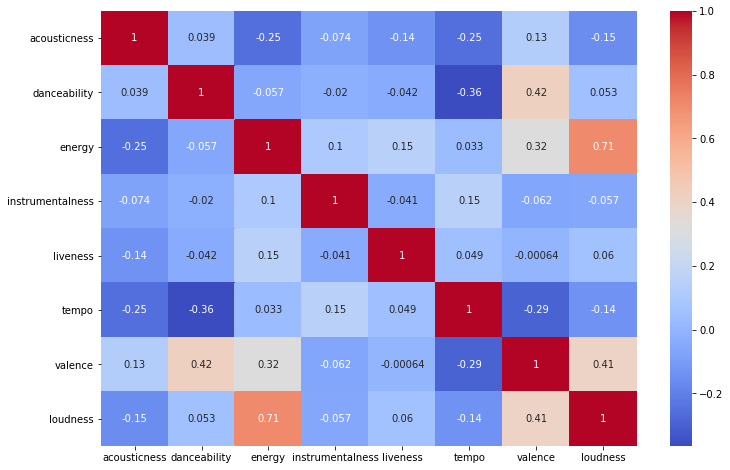

In [29]:
correlation = df_2017[['acousticness','danceability','energy','instrumentalness','liveness','tempo','valence',
                       'loudness']]
plt.figure(figsize=(12,8))
sns.heatmap(correlation.corr(), annot=True,cmap="coolwarm");

##### We can observe that there is a correlation between the loudness and the perceived energy of the song. The jointplots indicate a correlation between these two. Lets understand  how much one feature si impacted by another feature 

In [30]:
def create_joinplot(val1,val2,year,colr):
    sns.jointplot(val1,val2, data=year,kind='reg',color=colr)

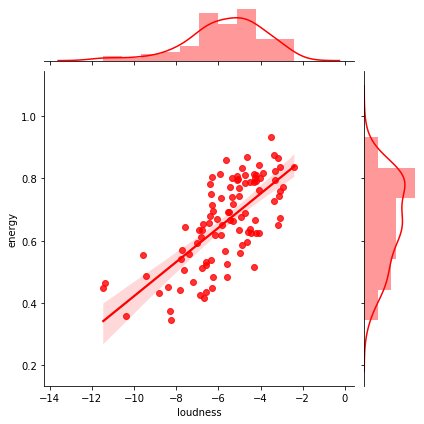

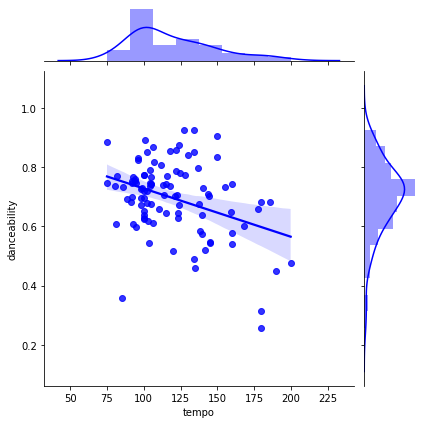

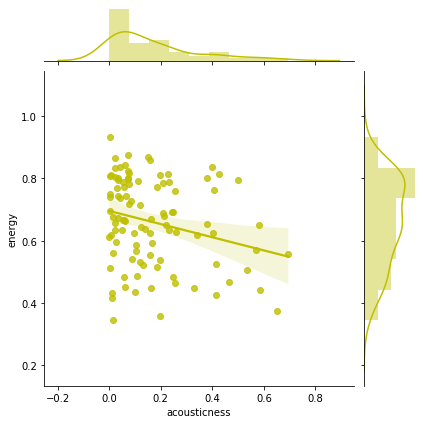

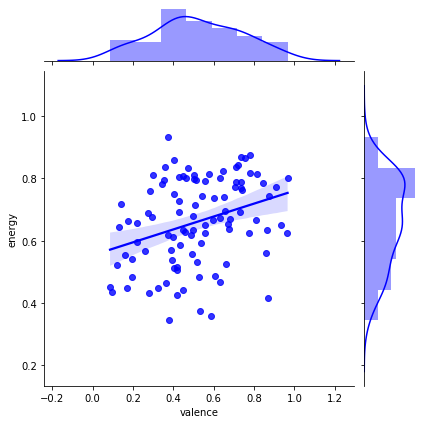

In [31]:

create_joinplot('loudness','energy',df_2017,'r')
create_joinplot('tempo','danceability',df_2017,'b')
create_joinplot('acousticness','energy',df_2017,'y')
create_joinplot('valence','energy',df_2017,'b')

### from the corelation matrix we observe that  
- there is a relation between  tempo and dancebility 
- there is a relation between  acounsticeness and energy 
- there is a relation between  tempo and acousticeness
- there is a relation between  energy and loudness
- there is a relation between  tempo and valence
- there is a relation between  valence and dancebility 
- there is a relation between  valence and energy  

#### understand these correlation features in more details ;


In [32]:
def feature_details(feature):
    print("Mean value ", feature.mean())
    sns.distplot(feature,color="r")
    plt.show()


Mean value  0.6968199999999999


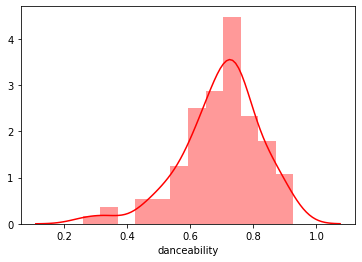

In [33]:
feature_details(df_2017['danceability'])

*Conclusion*: top songs have high dancebility.And people listen to those songs in which they can dance.

Mean value  0.6606899999999999


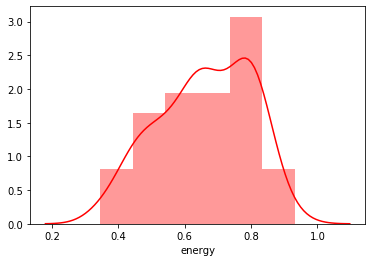

In [34]:
feature_details(df_2017['energy'])

*Conclusion*:people like energetic songs 

Mean value  -5.6526499999999995


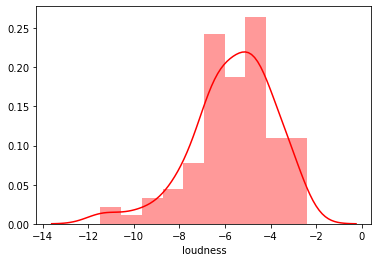

In [35]:
feature_details(df_2017['loudness'])

*Conclusion*: more noice means more ranking 

Mean value  0.16630648999999997


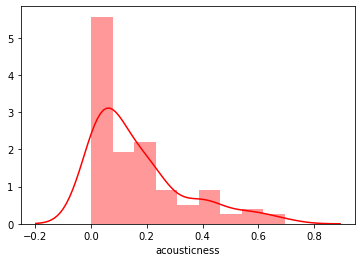

In [36]:
feature_details(df_2017['acousticness'])

*Conclusion*:people don't lisen more to the acoustics 

Mean value  0.5170489999999999


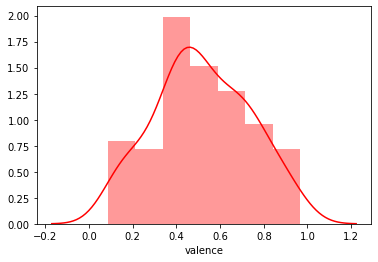

In [37]:
feature_details(df_2017['valence'])

*Conclusion*:songs are evenly distributed and totally depends upon the mood 

Mean value  119.20246000000002


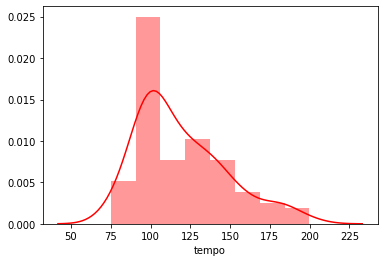

In [38]:
feature_details(df_2017['tempo'])

*Conclusion*:people listen fast songs more 

### Again construct a 3d graph  with out limited features for better understanding 

In [39]:

feture_to_plot = ["energy", "liveness", "tempo", "valence","danceability"]
text1 = df_2017["artists"] + " - " + df_2017["name"]
text2 = text1.values
X = df_2017[feture_to_plot].values
y = df_2017["danceability"].values
min_maxscaler = MinMaxScaler()
X = min_maxscaler.fit_transform(X)
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

plot3d = go.Scatter3d(
    x=X[:,0],
    y=X[:,1],
    z=X[:,2],
    text=text2,
    mode="markers",
    marker=dict(
        size=8,
        color=y
    )
)

fig = go.Figure(data=[plot3d])
py.iplot(fig, filename="3d graph-2nd")


 ### create a popularity column depending on our matrices

In [41]:
df_2017["popularity"]=""
df_2017.loc[(df_2017['danceability']>=0.69) | (df_2017['energy']>=0.66)| (df_2017['loudness']>=-5.6)| (df_2017['acousticness']>=0.16)| 
            (df_2017['valence']>=0.51)| (df_2017['tempo']>=119.0),'popularity']='1'
df_2017.loc[(df_2017['danceability']<0.69) & (df_2017['energy']<0.66) & (df_2017['loudness']<-5.6),'popularity']='0'
df_2017.head()

df_2017.to_csv("./data/df_2017_new.csv",index=False)

FileNotFoundError: [Errno 2] No such file or directory: './data/df_2017_new.csv'

In [42]:
df_2017.head()

,id,name,artists,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,dancebility_new,tempo_rate,popularity
0,7qiZfU4dY1lWllzX7mPBI,Shape of You,Ed Sheeran,0.825,0.652,1.0,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,233713.0,4.0,1,moderate,1
1,5CtI0qwDJkDQGwXD1H1cL,Despacito - Remix,Luis Fonsi,0.694,0.815,2.0,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,228827.0,4.0,1,moderate,1
2,4aWmUDTfIPGksMNLV2rQP,Despacito (Featuring Daddy Yankee),Luis Fonsi,0.660,0.786,2.0,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,228200.0,4.0,1,very fast,1
3,6RUKPb4LETWmmr3iAEQkt,Something Just Like This,The Chainsmokers,0.617,0.635,11.0,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,247160.0,4.0,1,moderate,0
4,3DXncPQOG4VBw3QHh3S81,I'm the One,DJ Khaled,0.609,0.668,7.0,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,288600.0,4.0,1,moderate,1


In [44]:
df_2017_new=pd.read_csv('./data/df_2017_new.csv')


FileNotFoundError: [Errno 2] File ./data/df_2017_new.csv does not exist: './data/df_2017_new.csv'

## corelation between features and popularity

In [45]:
def draw(year,compare_col,color):
    graph = sns.FacetGrid(df_2017_new, col = "popularity")
    graph.map(sns.distplot, compare_col, bins = 25,color=color)
    return plt.show()

In [46]:
draw(df_2017_new,"danceability","b")
draw(df_2017_new,"acousticness","r")
draw(df_2017_new,"loudness","m")
draw(df_2017_new,"valence","r")
draw(df_2017_new,"tempo","y")


NameError: name 'df_2017_new' is not defined

In [47]:
popularity_data = pd.concat([df_2017_new["name"],df_2017_new["popularity"]],axis=1)
popularity_data.head()

NameError: name 'df_2017_new' is not defined

In [48]:
df_2017_final=df_2017.copy()
df_2017_final.drop(["id","name","artists","tempo_rate","dancebility_new"],axis=1,inplace=True)
df_2017_final.columns


Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'popularity'],
      dtype='object')

In [49]:
df_2017_final["key"] = df_2017_final["key"].astype("category")
df_2017_final = pd.get_dummies(df_2017_final, columns=["key"])
df_2017_final.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_2.0,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0
0,0.825,0.652,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,...,0,0,0,0,0,0,0,0,0,0
1,0.694,0.815,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,...,1,0,0,0,0,0,0,0,0,0
2,0.660,0.786,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,...,1,0,0,0,0,0,0,0,0,0
3,0.617,0.635,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,...,0,0,0,0,0,0,0,0,0,1
4,0.609,0.668,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,...,0,0,0,0,0,1,0,0,0,0


In [50]:
df_2017_final["time_signature"] = df_2017_final["time_signature"].astype("category")
df_2017_final = pd.get_dummies(df_2017_final, columns=["time_signature"])
df_2017_final.head()

,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,...,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,time_signature_3.0,time_signature_4.0
0,0.825,0.652,-3.183,0.0,0.0802,0.5810,0.000000,0.0931,0.931,95.977,...,0,0,0,0,0,0,0,0,0,1
1,0.694,0.815,-4.328,1.0,0.1200,0.2290,0.000000,0.0924,0.813,88.931,...,0,0,0,0,0,0,0,0,0,1
2,0.660,0.786,-4.757,1.0,0.1700,0.2090,0.000000,0.1120,0.846,177.833,...,0,0,0,0,0,0,0,0,0,1
3,0.617,0.635,-6.769,0.0,0.0317,0.0498,0.000014,0.1640,0.446,103.019,...,0,0,0,0,0,0,0,1,0,1
4,0.609,0.668,-4.284,1.0,0.0367,0.0552,0.000000,0.1670,0.811,80.924,...,0,0,0,1,0,0,0,0,0,1


In [51]:
def change_datatype(var):
    df_2017_final[var] = df_2017_final[var].astype(int)
    
columns= ["key_0.0","key_1.0","key_2.0",
         "key_3.0","key_4.0","key_5.0","key_6.0","key_7.0","key_8.0","key_9.0","key_10.0","key_11.0","time_signature_3.0","time_signature_4.0"]
for column in columns:
    change_datatype(column)
    

In [52]:
def load_data():
    
    y = df_2017_final["popularity"].values
    X = df_2017_final.drop(["popularity"],axis=1)
    return X,y
X,y =load_data()

feature_cols = X.columns.to_list()

#### There is not a great  linear correlations in our data So, Decision Tree algorithms will give  better results as compared to linear regression models. Therfore using  Random Forest 
 

In [53]:

#x_data=X
X,y = load_data()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.6)
# X_train = X_train.T
# X_test = X_test.T
X_train=X_train[:None]
X_test=X_test[:None]
y_train = y_train.astype(int).T
y_test = y_test.astype(int).T
print("X_train: ",X_train.shape)
print("X_test: ",X_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)


X_train:  (40, 25)
X_test:  (60, 25)
y_train:  (40,)
y_test:  (60,)


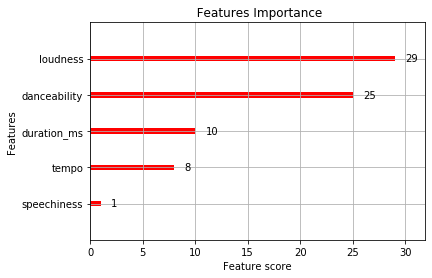

In [55]:
def plot_impfeature():
    xgb = XGBClassifier()
    xgb.fit(X_train, y_train)
    ax = plot_importance(xgb,color="r", height=0.15,
                         title='  Features Importance ', xlabel='Feature score', ylabel='Features',
                         importance_type='weight'
                        )

    return plt.show()


plot_impfeature()

##### The above graph assure that :
-  Our proposed ranked features turned out to be  most important for this data  
-  Example: we calculated features like :dancebility ,energy,loudness ets of most importance.And hence thus turned out true.

In [56]:
rf=RandomForestClassifier(random_state = 3)
rf.fit(X_train,y_train)

print("Train accuracy ",rf.score(X_train,y_train))
print("Test accuracy ",rf.score(X_test,y_test))

RandomForestClassifier_score=rf.score(X_test,y_test)
y_pred=rf.predict(X_test)
t_true=y_test

Train accuracy  1.0
Test accuracy  0.8166666666666667
